In [24]:
using Pkg
Pkg.activate("/home/julisn/Codes/LadderDGA.jl/")
using LadderDGA
using Plots, LaTeXStrings

  Activating project at `~/Codes/LadderDGA.jl`


In [25]:
# Fd -> +U
# Fm -> -U

In [26]:
sampling = LadderDGA.Dispersions.gen_sampling(LadderDGA.Dispersions.cPnn, 2, 8)
kGrid_f = map(v -> LadderDGA.Dispersions.basis_transform(LadderDGA.Dispersions.cP,  v), sampling)
show(stdout, "text/plain", kGrid_f)

k0 = findfirst(k -> all(k .≈ 0), kGrid_f)
println("\nk0 = $k0, isnothing = ", isnothing(k0))

8×8 Matrix{Tuple{Float64, Float64}}:
 (-2.35619, -2.35619)   (-2.35619, -1.5708)   (-2.35619, -0.785398)   (-2.35619, 0.0)   (-2.35619, 0.785398)   (-2.35619, 1.5708)   (-2.35619, 2.35619)   (-2.35619, 3.14159)
 (-1.5708, -2.35619)    (-1.5708, -1.5708)    (-1.5708, -0.785398)    (-1.5708, 0.0)    (-1.5708, 0.785398)    (-1.5708, 1.5708)    (-1.5708, 2.35619)    (-1.5708, 3.14159)
 (-0.785398, -2.35619)  (-0.785398, -1.5708)  (-0.785398, -0.785398)  (-0.785398, 0.0)  (-0.785398, 0.785398)  (-0.785398, 1.5708)  (-0.785398, 2.35619)  (-0.785398, 3.14159)
 (0.0, -2.35619)        (0.0, -1.5708)        (0.0, -0.785398)        (0.0, 0.0)        (0.0, 0.785398)        (0.0, 1.5708)        (0.0, 2.35619)        (0.0, 3.14159)
 (0.785398, -2.35619)   (0.785398, -1.5708)   (0.785398, -0.785398)   (0.785398, 0.0)   (0.785398, 0.785398)   (0.785398, 1.5708)   (0.785398, 2.35619)   (0.785398, 3.14159)
 (1.5708, -2.35619)     (1.5708, -1.5708)     (1.5708, -0.785398)     (1.5708, 0.0)     (1.5708, 0

In [27]:
#cfg = "/home/julisn/Codes/lDGA_pp_test/tp0_50_s1_U2.0_b5.0_mu1.0/config.toml"
#cfg = "/home/julisn/Codes/lDGA_pp_test/test_2/config.toml"
cfg = "/home/julisn/Codes/lDGA_pp_test/tp1_50_s0_U2.0_b5.0_mu1.0/config.toml"
#cfg = "/home/julisn/Codes/lDGA_pp_test/tp1_50_s1_U2.0_b5.0_mu1.0/config.toml"

wp, mP, sP, env, kGridsStr = readConfig(cfg)
lDGAhelper = setup_LDGA(kGridsStr[1], mP, sP, env)
lDGAhelper_Ur = deepcopy(lDGAhelper)
lDGAhelper_Ur.Γ_m[:,:,:] = lDGAhelper_Ur.Γ_m[:,:,:] .- (-lDGAhelper_Ur.mP.U / lDGAhelper_Ur.mP.β^2)
lDGAhelper_Ur.Γ_d[:,:,:] = lDGAhelper_Ur.Γ_d[:,:,:] .- ( lDGAhelper_Ur.mP.U / lDGAhelper_Ur.mP.β^2)

bubble     = calc_bubble(:DMFT, lDGAhelper);
bubble_pp  = calc_bubble(:DMFT, lDGAhelper; mode=:pp);

[ Info: Reading Inputs...
[ Info: Setting up calculation for kGrid 2Dsc-0.25-0.2-0.1 of size 8
WARNING!!! k-grid sampling must contain zero-vector in order for convolutions to work!
DBG: NOT using diagonal terms in λ₀
┌ Info: Inputs Read. Starting Computation.
│ Local susceptibilities with ranges are:
│ χLoc_m(3:99) = 0.4075, χLoc_d(3:99) = 0.0925
└ sum χupup check (plain ?≈? tail sub ?≈? imp_dens ?≈? n/2 (1-n/2)): 0.2483152624470974 ?=? 0.24999862492097769 ?≈? 0.24999862492097769 ≟ 0.24999268986197437"


In [28]:
χm, γm = calc_χγ(:m, lDGAhelper, bubble);
χd, γd = calc_χγ(:d, lDGAhelper, bubble);
#λ₀ = calc_λ0(bubble, lDGAhelper)
#Σ_ladder = calc_Σ(χm, γm, χd, γd, λ₀, lDGAhelper);

[ Info: m channel: |∑χ(q=0,ω≠0)| = 0.029493288226 ≟ 0
[ Info: d channel: |∑χ(q=0,ω≠0)| = 0.032300612158 ≟ 0


In [29]:
χm_star, γm_star = calc_χγ(:m, lDGAhelper_Ur, bubble)
χd_star, γd_star = calc_χγ(:d, lDGAhelper_Ur, bubble);

[ Info: m channel: |∑χ(q=0,ω≠0)| = 0.037942873139 ≟ 0
[ Info: d channel: |∑χ(q=0,ω≠0)| = 0.023978210945 ≟ 0


# Matrix identity for difference between chi and chi^star


Let A and (A+B) be invertible matrices and rank(B) = 1. Then (see lDGA numerics):

$(A+B)^{-1} = A^{-1} - \frac{1}{1+g} A^{-1} B A^{-1}$ and $g = Tr(B A^{1}) \neq 1$



In [30]:
using LinearAlgebra
@time χm_gen      = calc_gen_χ(lDGAhelper.Γ_m,    bubble, lDGAhelper.kG);
@time χm_star_gen = calc_gen_χ(lDGAhelper_Ur.Γ_m, bubble, lDGAhelper_Ur.kG);
@time χd_star_gen = calc_gen_χ(lDGAhelper_Ur.Γ_d, bubble, lDGAhelper_Ur.kG);

  2.125371 seconds (106.48 k allocations: 700.847 MiB, 1.34% gc time, 6.24% compilation time)
  1.319615 seconds (10.61 k allocations: 694.457 MiB, 0.74% gc time)
  1.292988 seconds (10.61 k allocations: 694.457 MiB, 1.08% gc time)


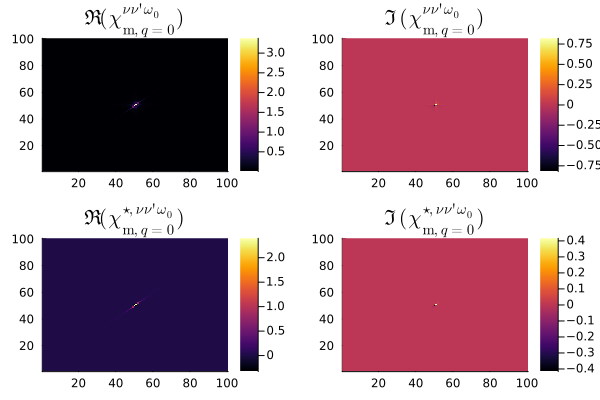

In [31]:
p1 = heatmap(real.(χm_gen[:,:,1,51]), 
    title=L"\Re(\chi^{\nu\nu'\omega_0}_{\mathrm{m},q=0})")
p2 = heatmap(imag.(χm_gen[:,:,1,51]), 
    title=L"\Im(\chi^{\nu\nu'\omega_0}_{\mathrm{m},q=0})")
p3 = heatmap(real.(χm_star_gen[:,:,1,51]), 
    title=L"\Re(\chi^{\star,\nu\nu'\omega_0}_{\mathrm{m},q=0})")
p4 = heatmap(imag.(χm_star_gen[:,:,1,51]), 
    title=L"\Im(\chi^{\star,\nu\nu'\omega_0}_{\mathrm{m},q=0})")

plot(p1, p2, p3, p4)

# Calculation of F_r

??????

$ \gamma^{\nu\omega}_{m/d,q} = \beta (\chi^{\nu\nu'\omega}_{0,\mathbf{q}})^{-1}\sum \chi^{\star,\nu\nu'\omega}_{m/d,q} \pm 1 $ 


$ F^{\nu\nu'\omega}_{r,\mathbf{q}} = \beta^2 (\chi^{\nu\nu'\omega}_{0,\mathbf{q}})^{-1} 
            -  \beta^2 (\chi^{\nu\omega}_0)^{-1} \chi^{*,\nu\nu'\omega}_{r,\mathbf{q}} (\chi^{\nu'\omega}_0)^{-1} 
        + U_r (1 - U_r \chi^{\omega}_r) (\chi^{\nu\omega}_{0,\mathbf{q}})^{-1} \sum_{\nu_1\nu_2}\chi^{*,\nu\nu_1\omega}_{r,\mathbf{q}} \chi^{*,\nu_2\nu'\omega}_{r,\mathbf{q}} (\chi^{\nu'\omega}_{0,\mathbf{q}})^{-1} $

### pm 1 missing?? 
$ F^{\nu\nu'\omega}_{r,\mathbf{q}} = 
            \beta^2 (\chi^{\nu\nu'\omega}_{0,\mathbf{q}})^{-1}
            -  \beta^2 (\chi^{\nu\omega}_{0,\mathbf{q}})^{-1} \chi^{*,\nu\nu'\omega}_{r,\mathbf{q}} (\chi^{\nu'\omega}_{0,\mathbf{q}})^{-1} 
        + U_r (1 - U_r \chi^{\omega}_r) (\gamma^{\nu\omega}_r \mp 1) (\gamma^{\nu'\omega}_r \mp 1) $
        
$ F^{\nu\nu'\omega}_{r,\mathbf{q}} =
        \beta^2 \left( \chi^{\nu\nu'\omega}_{0,\mathbf{q}} \right)^{-1} 
        +  \beta^2 \left( \chi^{\nu\omega}_{0,\mathbf{q}} \right)^{-1}  \chi^{\nu\nu'\omega}_{r,\mathbf{q}} \left( \chi^{\nu'\omega}_{0,\mathbf{q}} \right)^{-1} $

In [32]:
function core(χ₀::χ₀T)
    view(χ₀.data, :,χ₀.ν_shell_size+1:size(χ₀.data,2)-χ₀.ν_shell_size,:)
end

function F_from_χ_star_gen(χ₀::χ₀T, χstar_r::Array{ComplexF64,4}, χr::χT, γr::γT, Ur::Float64)
    F = similar(χstar_r)
    for ωi in axes(χstar_r,4)
        for qi in axes(χstar_r,3)
            pre_factor = Ur * (1 - Ur * χr[qi,ωi])
            for νpi in axes(χstar_r,2)
                @simd for νi in axes(χstar_r,1)
                    @inbounds F[νi,νpi,qi,ωi]  = -χ₀.β^2 * χstar_r[νi,νpi,qi,ωi] / (core(χ₀)[qi,νi,ωi] * core(χ₀)[qi,νpi,ωi])
                    @inbounds F[νi,νpi,qi,ωi] +=  pre_factor * γr[qi,νi,ωi] * γr[qi,νpi,ωi]
                end
                F[νpi,νpi,qi,ωi] += χ₀.β^2 / core(χ₀)[qi,νpi,ωi]
            end
        end
    end
    return F
end

function F_r_test(χ₀::χ₀T, χr)
    F = -deepcopy(χr)
    for ωi in 1:size(χm_gen,4)
        for qi in 1:size(χm_gen,3)
            for νpi in 1:size(χm_gen,2)
                for νi in 1:size(χm_gen,1)
                    F[νi,νpi,qi,ωi] = χ₀.β^2 .* F[νi,νpi,qi,ωi]/(core(χ₀)[qi,νi,ωi] * core(χ₀)[qi,νpi,ωi])
                end
                F[νpi,νpi,qi,ωi] += χ₀.β^2 / core(χ₀)[qi,νpi,ωi]
            end
        end
    end
    return F
end

function F_from_χ_star_gen_test(χ₀::χ₀T, χstar_r::Array{ComplexF64,4}, χr::χT, γr::γT, Ur::Float64)
    F = similar(χstar_r)
    for ωi in 1:size(χstar_r,4)
        for qi in 1:size(χstar_r,3)
            F[:,:,qi,ωi] = Diagonal(χ₀.β^2 ./ core(χ₀)[qi,:,ωi]) .- χ₀.β^2 .* χstar_r[:,:,qi,ωi] ./ (core(χ₀)[qi,:,ωi] .* transpose(core(χ₀)[qi,:,ωi]))
            F[:,:,qi,ωi] +=  Ur * (1 - Ur * χr[qi,ωi]) .* ((γr[qi,:,ωi]) .* transpose(γr[qi,:,ωi]))
        end
    end
    return F
end

F_from_χ_star_gen_test (generic function with 1 method)

In [33]:
@time F_m_test1 = F_r_test(bubble, χm_gen);

 15.321915 seconds (152.93 M allocations: 4.794 GiB, 4.49% gc time, 2.83% compilation time)


In [34]:
@time F_m_test2 = F_from_χ_star_gen(bubble, χm_star_gen, χm, γm, -lDGAhelper.mP.U);
@time F_d_test2 = F_from_χ_star_gen(bubble, χd_star_gen, χd, γd, lDGAhelper.mP.U);

  0.382020 seconds (6 allocations: 231.171 MiB, 3.51% gc time)
  0.380805 seconds (5 allocations: 231.171 MiB, 1.58% gc time)


In [35]:
@time F_m_test3 = F_from_χ_star_gen_test(bubble, χm_star_gen, χm, γm, -lDGAhelper.mP.U);

  0.689941 seconds (27.28 k allocations: 1.370 GiB, 9.19% gc time)


In [36]:
test1 = sum(abs.(F_m_test1 .- F_m_test2)) / sum(abs.(F_m_test1))
tt = findmax(abs.(F_m_test1 .- F_m_test2))
test2 = sum(abs.(F_m_test2 .- F_m_test3))
println("$test1, $test2 /// max diff : " , tt) 

0.011677977660816139, 4.724937539590629e-8 /// max diff : (0.06834790578708581, CartesianIndex(50, 50, 1, 52))


lim: -1.9991697413424472 ?=? -2.0


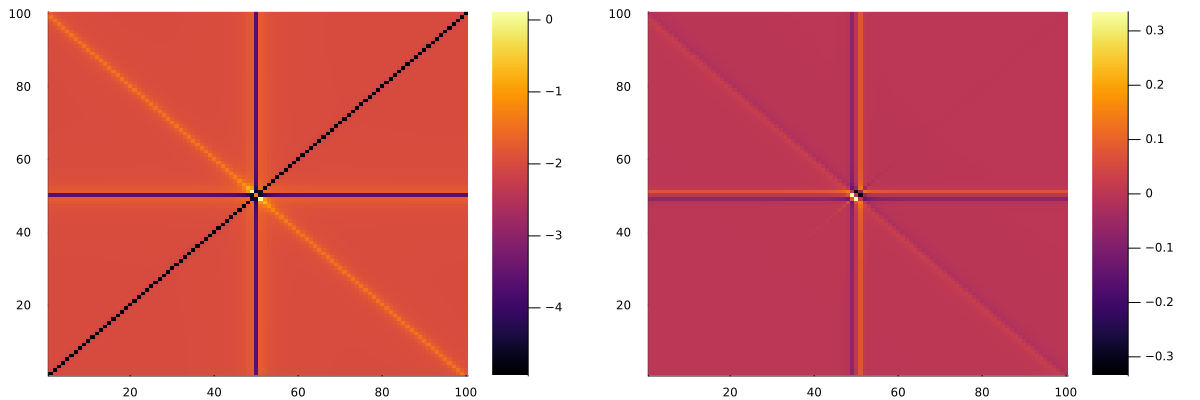

In [37]:
ωi = 52
qi = 1
p1 = heatmap(real(F_m_test1[:,:,qi,ωi]), titel="Re Test1")
p2 = heatmap(imag(F_m_test1[:,:,qi,ωi]), titel="Im Test1")
println("lim: ", real(F_m_test1[1,15,qi,1]), " ?=? ", -lDGAhelper.mP.U)
plot(p1, p2, size=(1200,400))

lim: -1.9991697413424472 ?=? -2.0


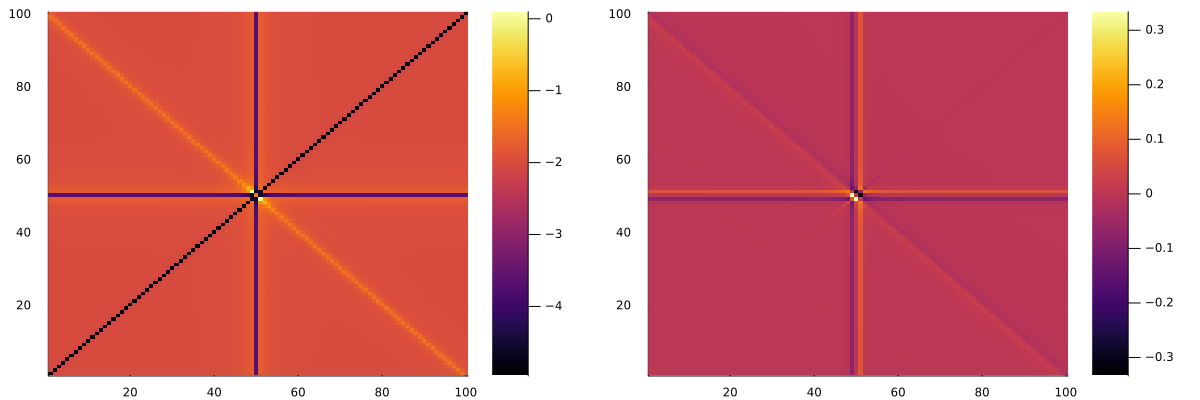

In [38]:
p1 = heatmap(real(F_m_test2[:,:,qi,ωi]), titel="Re Test4")
p2 = heatmap(imag(F_m_test2[:,:,qi,ωi]), titel="Im Test4")
println("lim: ", real(F_m_test1[1,15,qi,1]), " ?=? ", -lDGAhelper.mP.U)
plot(p1, p2, size=(1200,400))

lim: -1.9991697413424472 ?=? -2.0


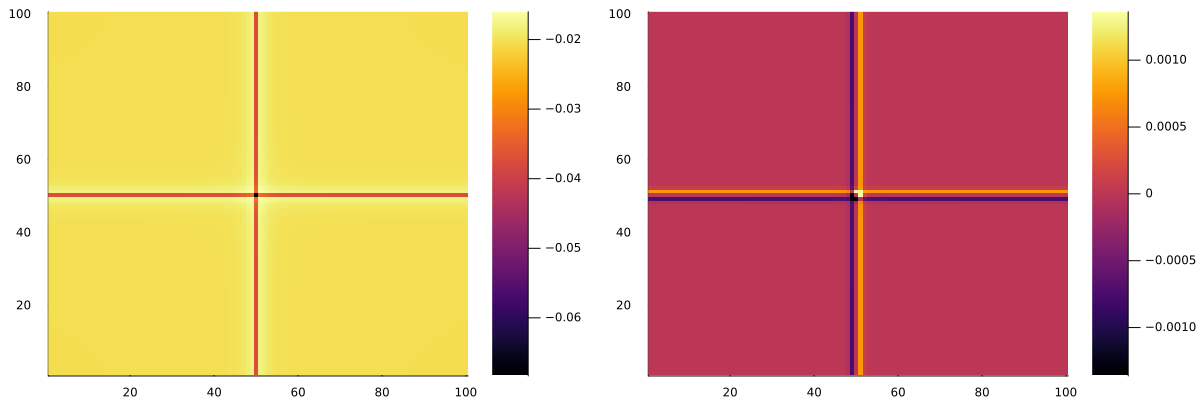

In [39]:
p1 = heatmap(real(F_m_test2 .- F_m_test1)[:,:,qi,ωi], titel="Re Test4")
p2 = heatmap(imag(F_m_test2 .- F_m_test1)[:,:,qi,ωi], titel="Im Test4")
println("lim: ", real(F_m_test1[1,15,qi,1]), " ?=? ", -lDGAhelper.mP.U)
plot(p1, p2, size=(1200,400))

lim: -2.0210283204580786


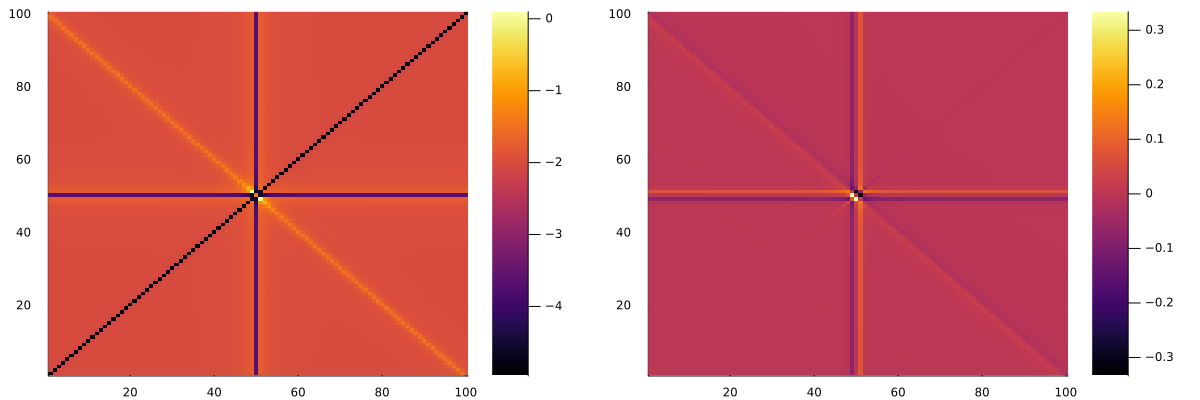

In [40]:
p1 = heatmap(real(F_m_test3[:,:,qi,ωi]), titel="Re Test3")
p2 = heatmap(imag(F_m_test3[:,:,qi,ωi]), titel="Im Test3")
println("lim: ", real(F_m_test3[1,12,qi,ωi]))
plot(p1, p2, size=(1200,400))

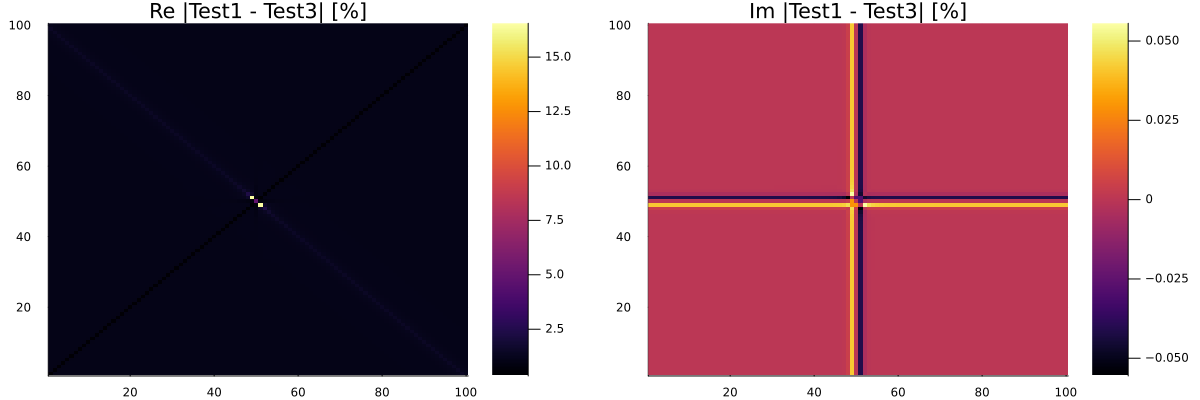

In [41]:
p1 = heatmap(100 .* real(((F_m_test1 .- F_m_test3)./abs.(F_m_test3))[:,:,qi,ωi]), title="Re |Test1 - Test3| [%]")
p2 = heatmap(100 .* imag(((F_m_test1 .- F_m_test3)./abs.(F_m_test3))[:,:,qi,ωi]), title="Im |Test1 - Test3| [%]")
plot(p1, p2, size=(1200,400))

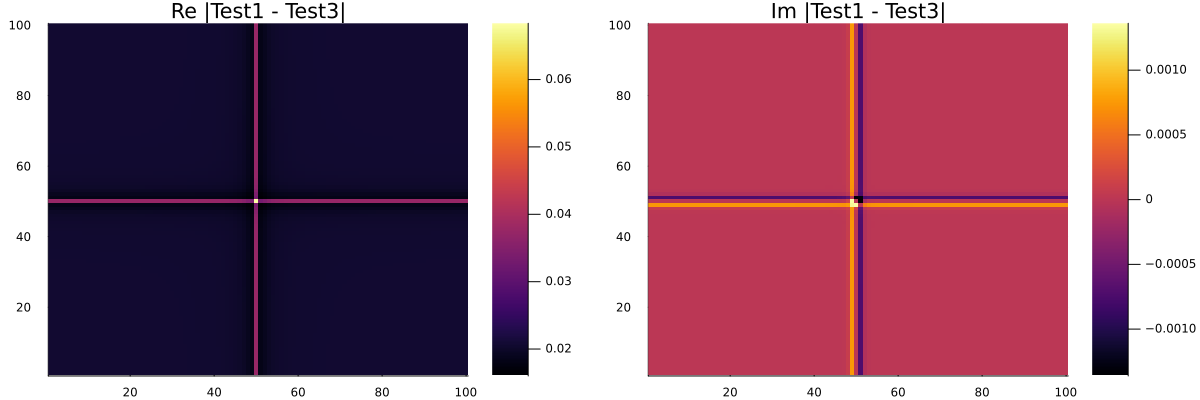

In [42]:
p1 = heatmap(real(((F_m_test1 .- F_m_test3))[:,:,qi,ωi]), title="Re |Test1 - Test3|")
p2 = heatmap(imag(((F_m_test1 .- F_m_test3))[:,:,qi,ωi]), title="Im |Test1 - Test3|")
plot(p1, p2, size=(1200,400))

In [43]:
F_m_loc = F_from_χ(lDGAhelper.χDMFT_m, lDGAhelper.gImp[1, :], lDGAhelper.sP, lDGAhelper.mP.β);
F_d_loc = F_from_χ(lDGAhelper.χDMFT_d, lDGAhelper.gImp[1, :], lDGAhelper.sP, lDGAhelper.mP.β);

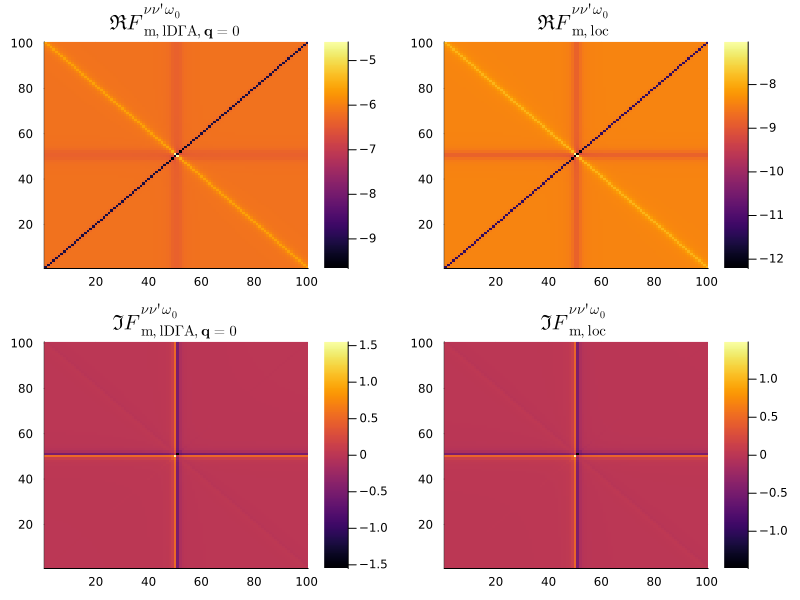

In [44]:
ωi = 51

ωn = (-lDGAhelper.sP.n_iω:lDGAhelper.sP.n_iω)[ωi]
p1 = heatmap(real(F_m_test2[:,:,1,ωi]), title=L"\Re F^{\nu\nu'\omega_{%$ωn}}_{\mathrm{m},\mathrm{lD}\Gamma\mathrm{A},\mathbf{q}=0}")
p2 = heatmap(real(F_m_loc[:,:,ωi]), title=L"\Re F^{\nu\nu'\omega_{%$ωn}}_{\mathrm{m},\mathrm{loc}}")
p3 = heatmap(imag(F_m_test2[:,:,1,ωi]), title=L"\Im F^{\nu\nu'\omega_{%$ωn}}_{\mathrm{m},\mathrm{lD}\Gamma\mathrm{A},\mathbf{q}=0}")
p4 = heatmap(imag(F_m_loc[:,:,ωi]), title=L"\Im F^{\nu\nu'\omega_{%$ωn}}_{\mathrm{m},\mathrm{loc}}")
plot(p1, p2, p3, p4, size=(800,600))

## F_r asympt checks

In [45]:
U = lDGAhelper.mP.U
β = lDGAhelper.mP.β
qi = 4
ω0 = lDGAhelper.sP.n_iω+1


χ_d_asympt = lDGAhelper.sP.χ_helper.χch_asympt
χ_m_asympt = lDGAhelper.sP.χ_helper.χsp_asympt
χ_pp_asympt = lDGAhelper.sP.χ_helper.χpp_asympt

Γd_lim_diag =  U + U^2/2 * χ_d_asympt[1] + 1.5 * U^2 * χ_m_asympt[1] 
Γm_lim_diag = -U + U^2/2 * χ_d_asympt[1] - 0.5 * U^2 * χ_m_asympt[1]
Γs_lim_diag = 2U - U^2/2 * χ_d_asympt[1] + 1.5 * U^2 * χ_m_asympt[1]
Γt_lim_diag =    + U^2/2 * χ_d_asympt[1] + 0.5 * U^2 * χ_m_asympt[1];

Γd_lim_bg =  U
Γm_lim_bg = -U
Γs_lim_bg = 2U
Γt_lim_bg = 0.0;


Fd_lim_diag =  U + U^2/2 * χ_d_asympt[1] + 1.5 * U^2 * χ_m_asympt[1] - 1 * U^2 * χ_d_asympt[1]
Fm_lim_diag = -U + U^2/2 * χ_d_asympt[1] - 0.5 * U^2 * χ_m_asympt[1] - 1 * U^2 * χ_m_asympt[1]
Fs_lim_diag = 2U - U^2/2 * χ_d_asympt[1] + 1.5 * U^2 * χ_m_asympt[1] - 2 * U^2 * χ_pp_asympt[1]
Ft_lim_diag =      U^2/2 * χ_d_asympt[1] + 0.5 * U^2 * χ_m_asympt[1] ;

Fd_lim_bg =  U - 1 * U^2 * χ_d_asympt[1]
Fm_lim_bg = -U - 1 * U^2 * χ_m_asympt[1]
Fs_lim_bg = 2U - 2 * U^2 * χ_pp_asympt[1]
Ft_lim_bg = 0.0;

Fd_lim_bg_nl =  U - 1 * U^2 * χd[qi,ω0]
Fm_lim_bg_nl = -U - 1 * U^2 * χm[qi,ω0]
Fs_lim_bg_nl = 2U - 2 * U^2 * χ_pp_asympt[1]
Ft_lim_bg_nl = 0.0;

Fd_bg_diff = Fd_lim_bg_nl - Fd_lim_bg 
Fm_bg_diff = Fm_lim_bg_nl - Fm_lim_bg 
Fs_bg_diff = Fs_lim_bg_nl - Fs_lim_bg 
Ft_bg_diff = Ft_lim_bg_nl - Ft_lim_bg

Fd_lim_diag_nl = Fd_lim_diag + Fd_bg_diff # U + U^2/2 * χd[qi,ω0] + 1.5 * U^2 * χm[qi,ω0] - 1 * U^2 * χd[qi,ω0]      - Fd_bg_diff
Fm_lim_diag_nl = Fm_lim_diag + Fm_bg_diff #-U + U^2/2 * χd[qi,ω0] - 0.5 * U^2 * χm[qi,ω0] - 1 * U^2 * χm[qi,ω0]      - Fm_bg_diff
Fs_lim_diag_nl = Fs_lim_diag + Fs_bg_diff #2U - U^2/2 * χd[qi,ω0] + 1.5 * U^2 * χm[qi,ω0] - 2 * U^2 * χ_pp_asympt[1] - Fs_bg_diff
Ft_lim_diag_nl = Ft_lim_diag + Ft_bg_diff #     U^2/2 * χd[qi,ω0] + 0.5 * U^2 * χm[qi,ω0] - Ft_bg_diff;

Fd_lim_bg_nl_int = kintegrate(lDGAhelper.kG,  U .- 1 .* U^2 .* χd[:,ω0],1)[1]
Fm_lim_bg_nl_int = kintegrate(lDGAhelper.kG, -U .- 1 .* U^2 .* χm[:,ω0],1)[1]
Fs_lim_bg_nl_int = 2U - 2 * U^2 * χ_pp_asympt[1]
Ft_lim_bg_nl_int = 0.0;

Fd_bg_int_diff = Fd_lim_bg_nl_int - Fd_lim_bg
Fm_bg_int_diff = Fm_lim_bg_nl_int - Fm_lim_bg
Fs_bg_int_diff = Fs_lim_bg_nl_int - Fs_lim_bg
Ft_bg_int_diff = Ft_lim_bg_nl_int - Ft_lim_bg

Fd_lim_diag_nl_int = Fd_lim_diag+ Fd_bg_int_diff
Fm_lim_diag_nl_int = Fm_lim_diag + Fm_bg_int_diff
Fs_lim_diag_nl_int = Fs_lim_diag + Fs_bg_int_diff
Ft_lim_diag_nl_int = Ft_lim_diag + Ft_bg_int_diff;

In [46]:
# - compensates global -1 factor in script

function format_out(val, lim; digits=5, atol=1e-1)
    lim_s = lpad(rpad(round(real(lim),digits=digits), 6, "0"),10, " ")
    val_s = lpad(rpad(round(real(val),digits=digits), 6, "0"),10, " ")
    sim = isapprox(val, lim, atol=atol) ? "\e[1m\e[38;2;0;150;50;249m✓\x1b[0m" :  "\e[1m\e[38;2;250;0;0;249m↯\x1b[0m"
    return "$val_s ≟ $lim_s  " * sim
end

F_m_loc_internal   = F_from_χ(:m, lDGAhelper);
F_d_loc_internal   = F_from_χ(:d, lDGAhelper);


nBose = lDGAhelper.sP.n_iω
ω0_ind = nBose + 1
nan_ind = trunc(Int,nBose/2+10)

F_m_kint = kintegrate(lDGAhelper.kG, F_m_test2, 3)[:,:,1,:]
#testlist = [("direct qi=$qi", F_m_test1[:,:,qi,:]) for qi in 1:size(F_m_test3,3)]
testlist = [("∫F dk ",F_m_kint, :m_nl_int), ("Fm_loc ", F_m_loc, :m_loc), ("Fd_loc ", F_d_loc, :d_loc), ("Fm_loc2", F_m_loc_internal, :m_loc), ("Fd_loc2", F_d_loc_internal, :d_loc), ("Fd_q  ", F_d_test2[:,:,qi,:], :d_nl),("Fm_q  ",F_m_test1[:,:,qi,:], :m_nl),("Fm_q 2",F_m_test2[:,:,qi,:], :m_nl),("Fm_q 3",F_m_test3[:,:,qi,:], :m_nl)]
println("                               numerical ≟ exact (q = $(round.(lDGAhelper.kG.kGrid[qi], digits=2)))")
println("   ================ Fm ==================   ")
for (name, val, t) in testlist
    if t == :m_nl 
        println("Diagonal $name   (nl)    :   $(format_out(val[1,1,ω0_ind] , Fm_lim_diag_nl))")
        println("Background $name (nl)    :   $(format_out(val[30,1,ω0_ind], Fm_lim_bg_nl))")
    elseif t == :d_nl
        println("Diagonal $name   (nl)    :   $(format_out(val[1,1,ω0_ind] , Fd_lim_diag_nl))")
        println("Background $name (nl)    :   $(format_out(val[30,1,ω0_ind], Fd_lim_bg_nl))")
    elseif t == :m_nl_int
        println("Diagonal $name   (nl)    :   $(format_out(val[1,1,ω0_ind] , Fm_lim_diag_nl_int))")
        println("Background $name (nl)    :   $(format_out(val[30,1,ω0_ind], Fm_lim_bg_nl_int))")
    elseif t == :m_loc
        println("Diagonal $name   (loc)  :   $(format_out(val[1,1,ω0_ind] , Fm_lim_diag))")
        println("Background $name (loc)  :   $(format_out(val[30,1,ω0_ind], Fm_lim_bg))")
    elseif t == :d_loc
        println("Diagonal $name   (loc)  :   $(format_out(val[1,1,nBose+1] , Fd_lim_diag))")
        println("Background $name (loc)  :   $(format_out(val[30,1,nBose+1], Fd_lim_bg))")
    else
        println("ERROR, key $t not found!!")
    end
end

                               numerical ≟ exact (q = (1.57, 0.0))
   ================ Fm ==================   
Diagonal ∫F dk    (nl)    :    -11.40041 ≟  -11.37947  ✓
Background ∫F dk  (nl)    :     -8.45709 ≟   -8.43415  ✓
Diagonal Fm_loc    (loc)  :    -11.36574 ≟  -11.36543  ✓
Background Fm_loc  (loc)  :     -8.42241 ≟   -8.42011  ✓
Diagonal Fd_loc    (loc)  :     11.36366 ≟   11.36543  ✓
Background Fd_loc  (loc)  :      1.46525 ≟    1.47052  ✓
Diagonal Fm_loc2   (loc)  :    -11.36574 ≟  -11.36543  ✓
Background Fm_loc2 (loc)  :     -8.42241 ≟   -8.42011  ✓
Diagonal Fd_loc2   (loc)  :     11.36366 ≟   11.36543  ✓
Background Fd_loc2 (loc)  :      1.46525 ≟    1.47052  ✓
Diagonal Fd_q     (nl)    :      11.3442 ≟   11.36607  ✓
Background Fd_q   (nl)    :      1.44583 ≟    1.47117  ✓
Diagonal Fm_q     (nl)    :    -10.46217 ≟  -10.46193  ✓
Background Fm_q   (nl)    :     -7.51865 ≟   -7.51661  ✓
Diagonal Fm_q 2   (nl)    :    -10.48279 ≟  -10.46193  ✓
Background Fm_q 2 (nl)    :     -

## Matsuabra Frequencies Checks

$\nu_n + \nu_l = \frac{\pi}{\beta} \left( 2n + 1 + 2l + 1 \right) = \frac{\pi}{\beta} \left( 2(n+l + 1) \right) = \omega_{m+1}, \qquad m = n+l$

$\nu_n - \nu_l = \frac{\pi}{\beta} \left( 2n + 1 - 2l - 1 \right) = \frac{\pi}{\beta} \left( 2(n-l + 0) \right) = \omega_{m}, \qquad m = n-l$

$\omega_m \pm \omega_k = \frac{\pi}{\beta} \left( 2m \pm 2k \right) = \frac{\pi}{\beta} \left( 2(m \pm k) \right) = \omega_{r}, \qquad r = m \pm k$

$\omega_m + \nu_n = \frac{\pi}{\beta} \left( 2m + 2n + 1 \right) = \frac{\pi}{\beta} \left( 2(m+n) + 1 \right) = \omega_{l}, \qquad l = m+n$

$\omega_m - \nu_n = \frac{\pi}{\beta} \left( 2m - 2n - 1 \right) = \frac{\pi}{\beta} \left( 2(m-n) - 1 \right) = \frac{\pi}{\beta} \left( 2(m-n-1) + 1 \right) =  \omega_{l-1}, \qquad l = m-n$

# Calculation of F_ladder

## F_ladder in pp notation

$  F^{\nu\nu'\omega}_{\mathrm{ladder}, kk'q} =  \frac{1}{2} \left(
            F^{\lambda,\nu\nu'\omega}_{\mathrm{d},q}
            - F^{\lambda,\nu\nu'\omega}_{\mathrm{m},q} 
        \right) 
        - F^{\lambda,\nu(\omega+\nu)(\nu' - \nu)}_{\mathrm{m},k' - k}
        - F^{\nu\nu'\omega}_{\mathrm{loc},\uparrow\downarrow} $

## K-Grid sub-sampling

In [47]:
function find_non_nan_matrix(data::Matrix, nFermi::Int)
    nan_list       = sort(map(x->x[1],filter(x->x[1] == x[2], findall(x-> !isnan(x), data))))
    nh = searchsorted(nan_list, nFermi)
    res = if length(nh) == 1
        t1 = diff(nan_list[nh[1]:end])
        t2 = -1 * diff(nan_list[nh[1]:-1:1])
        lim_up = findfirst(x->x != 1, t1)
        lim_lo = findfirst(x->x != 1, t2)
        lim_up = isnothing(lim_up) ? length(t1) : lim_up
        lim_lo = isnothing(lim_lo) ? length(t2) : lim_lo
        lim_non_nan = min(lim_up, lim_lo)
        (nFermi-lim_non_nan):(nFermi+lim_non_nan)
    else
        []
    end
    return res
end

using JLD2
ϕs, ϕt = jldopen(joinpath(env.inputDir, "DMFT_out.jld2"),"r") do f
    f["Φpp_s"], f["Φpp_t"]
end;
ϕs = permutedims(ϕs, [2,3,1]);
ϕt = permutedims(ϕt, [2,3,1]);

ϕ_pp_ud = 0.5 .* (ϕs .+ ϕt);
ϕ_pp_ud2 = zeros(size(ϕ_pp_ud)); #0.5 .* (ϕs .+ ϕt);

In [48]:
expandKArr = LadderDGA.expandKArr
gridshape  = LadderDGA.gridshape

function getG_naive(kG, Σ, kp, νp, μ, β)
    ϵk = LadderDGA.Dispersions.gen_ϵkGrid(LadderDGA.Dispersions.grid_type(kG), [kp], kG.t, kG.tp, kG.tpp)[1]
    Σν = νp > -1 ? Σ[νp] : conj(Σ[-νp-1])
    Gk = 1/(1im * (2*νp+1)*π/β + μ - ϵk - Σν)
    return Gk
end

function GG_naive(kG, Σ, kp, νp, μ, β)
    Gk = getG_naive(kG, Σ, kp, νp, μ, β)
    G_minusk = getG_naive(kG, Σ, -1 .* kp, -νp-1, μ, β)
    #println(Gk, " ,", G_minusk)
    return Gk*G_minusk
end

function build_GG(kG, GF, νnGrid, k_vecs)
    res = Array{ComplexF64}(undef, length(νnGrid), length(k_vecs))

    for (νi,νn) in enumerate(νnGrid)
        GF_ν = expandKArr(kG, GF[:,νn].parent)
        GF_ν_minus_k_pre = expandKArr(kG, GF[:,-νn-1].parent)
        shift_vec = 2 .* kG.k0 .- gridshape(kG) .- 1
        GF_ν_minus_k = circshift(reverse(GF_ν_minus_k_pre), shift_vec)
        for (ki,k_vec) in enumerate(k_vecs)
            res[νi,ki] = GF_ν[ki]*GF_ν_minus_k[ki]
        end
    end
    return res
end


function build_q_access_kp_minus_k(kG, k_vecs)
    q_lookup = LadderDGA.Dispersions.build_q_lookup(kG)
    qi_access = Array{Int,2}(undef, length(k_vecs), length(k_vecs))
    for (ki,k_vec) in enumerate(k_vecs)
        for (kpi,kp_vec) in enumerate(k_vecs)
            q_vec = round.(LadderDGA.Dispersions.transform_to_first_BZ(kG, kp_vec .- k_vec), digits=6)                   
            qi_access[ki,kpi] = q_lookup[q_vec]
        end
    end
    return qi_access
end
function build_q_access_minus_k_minus_kp(kG, k_vecs)
    q_lookup = LadderDGA.Dispersions.build_q_lookup(kG)
    qi_access = Array{Int,2}(undef, length(k_vecs), length(k_vecs))
    for (ki,k_vec) in enumerate(k_vecs)
        for (kpi,kp_vec) in enumerate(k_vecs)
            q_vec = round.(LadderDGA.Dispersions.transform_to_first_BZ(kG, -1 .* k_vec .- kp_vec), digits=6) 
            q_vec = map(x-> x ≈ 0 ? 0.0 : x, q_vec)
            qi_access[ki,kpi] = q_lookup[q_vec]
        end
    end
    return qi_access
end

function build_q_access_k_minus_kp(kG, k_vecs)
    q_lookup = LadderDGA.Dispersions.build_q_lookup(kG)
    qi_access = Array{Int,2}(undef, length(k_vecs), length(k_vecs))
    for (ki,k_vec) in enumerate(k_vecs)
        for (kpi,kp_vec) in enumerate(k_vecs)
            q_vec = round.(LadderDGA.Dispersions.transform_to_first_BZ(kG, k_vec .- kp_vec), digits=6) 
            q_vec = map(x-> x ≈ 0 ? 0.0 : x, q_vec)
            qi_access[ki,kpi] = q_lookup[q_vec]
        end
    end
    return qi_access
end

build_q_access_k_minus_kp (generic function with 1 method)

## Lin. Eliashberg Eq.

### TODO: NEU TEXEN
    - nu indices
    - pp bubble structure?

$  F^{\nu\nu'\omega}_{\mathrm{ladder,ph,\uparrow\downarrow}, kk'q} =  \frac{1}{2} \left(
            F^{\lambda,\nu\nu'\omega}_{\mathrm{d},q}
            - F^{\lambda,\nu\nu'\omega}_{\mathrm{m},q} 
        \right) 
        - F^{\lambda,\nu(\omega+\nu)(\nu' - \nu)}_{\mathrm{m},k' - k}
        - F^{\nu\nu'\omega}_{\mathrm{loc},\uparrow\downarrow} $

$ \Phi_{\uparrow\downarrow} = \frac{1}{2} (\Phi_\mathrm{s}  +\Phi_\mathrm{t})$

$  \Gamma^{\nu\nu'\omega}_{\mathrm{s},kk'q} := \Gamma^{\nu\nu'\omega}_{\mathrm{pp},\uparrow\downarrow,kk'q} 
    = 
        F^{\nu'(-\nu)(\nu-\nu')}_{\mathrm{ladder},k'(-k)(k-k')} 
        - \Phi^{\nu\nu'\omega}_{\mathrm{loc},\mathrm{pp},\uparrow\downarrow,kk'q=0}  $
        
$\Gamma^{\nu\nu'\omega}_{s,kk'q} = \frac{1}{2} \left(
            F^{\lambda,\nu'(-\nu)(\nu-\nu')}_{\mathrm{d},k-k'}
            - F^{\lambda,\nu'(-\nu)(\nu-\nu')}_{\mathrm{m},k-k'} 
        \right) 
        - F^{\lambda,\nu'\nu(-\nu' - \nu)}_{\mathrm{m},k' - k}
        - F^{\nu(-\nu)(\nu-\nu')}_{\mathrm{loc},\uparrow\downarrow} - \Phi^{\nu\nu'\omega}_{\mathrm{loc},\uparrow\downarrow}$

$ \lambda \Delta^{\nu}_{k} = -\frac{1}{\beta N_k} \sum_{\nu' k'} \Gamma^{\nu\nu'\omega=0}_{kk'q=0} \chi^{\nu'\omega_0}_{0,\mathrm{s},k'} \Delta^{\nu'}_{k'}$

In [51]:
build_kGrid_subsample = LadderDGA.build_kGrid_subsample
Dispersions = LadderDGA.Dispersions
grid_type = LadderDGA.grid_type
grid_dimension = LadderDGA.grid_dimension
build_q_access = LadderDGA.build_q_access
freq_inbounds = LadderDGA.freq_inbounds
_gen_inv_work_arr = LadderDGA._gen_inv_work_arr
inv! = LadderDGA.inv!
KGrid = LadderDGA.KGrid
using JLD2


struct LinEliashbergEqHelper
    νnGrid::AbstractVector{Int}
    kG::KGrid
    k_vecs
    sub_i::AbstractVector
    νlen::Int
    klen::Int

    Phi_ud_pp::Array{ComplexF64,2}
    F_ud_pp_loc::Array{ComplexF64,2}
    F_m_pre::Array{ComplexF64,3}
    F_d_pre::Array{ComplexF64,3}
    χ₀_ph::χ₀T
    qi_access::Matrix{Int}
end

function LinEliashbEqHelper_test1(χ₀_ph, Fm_loc, Fd_loc, h::lDΓAHelper; νmax::Int = trunc(Int, h.sP.n_iν/2)-1, max_Nk::Int=10)
    # ==== Definition of Variables ====
    kG, sub_i = build_kGrid_subsample(h.kG, max_Nk)
    k_vecs = collect(Dispersions.gen_sampling(grid_type(kG), grid_dimension(kG), kG.Ns))

    Nq = length(kG.kMult)
    Nν = size(h.Γ_m, 1)
    νnGrid = -(νmax-1):(νmax-2)
    νlen = length(νnGrid)
    klen = length(k_vecs)
    ωn_pp = 0; 
    ωi_pp = h.sP.n_iω+1
    #Fm_loc = F_from_χ(:m, h);
    #Fd_loc = F_from_χ(:d, h);

    # ========= Preallocation =========
    freqIndexArr_ph = Array{Tuple{Int64, Int64, Int64},2}(undef, νlen, νlen)
    freqIndexArr_pp = Array{Tuple{Int64, Int64, Int64},2}(undef, νlen, νlen)
    Phi_ud          = Array{ComplexF64, 2}(undef, νlen, νlen)
    qi_access       = build_q_access(kG, k_vecs[:])
    
    #TODO: move this to IO
    Phi_s, Phi_t = jldopen(joinpath(env.inputDir, "DMFT_out.jld2"),"r") do f
        f["Φpp_s"], f["Φpp_t"]
    end;
    Phi_ud_pp= 0.5 .* (Phi_s[ωi_pp,:,:] .+ Phi_t[ωi_pp,:,:]);

    # ====== Build index_mapping ======
    # index_mapping containes (νn,νpn) for each ωn, necessary to build Γpp,ud from Fph,ud
    for (νi,νn) in enumerate(νnGrid)
        νi_pp  = νn + h.sP.n_iν+1;
        for (νpi,νpn) in enumerate(νnGrid)      
            ν_minus_νp = trunc(Int, (2*νn+1 - (2*νpn+1))/2)            # νn - νpn
            νp_minus_ν = trunc(Int, (2*νpn+1 - (2*νn+1))/2)            # νpn - νn
            minus_ν_minus_νp = - νn - νpn - 1                          # trunc(Int, (-(2*νn+1) - (2*νpn+1))/2)   # - νn - νpn
            minus_ν       = trunc(Int, -(2*νn+1)/2 - 1*(νn >= 0))
            minus_νp      = trunc(Int, -(2*νpn+1)/2 - 1*(νpn >= 0))
            ν_plus_νp  = νn + νpn + 1

            νpi_pp  = νpn + h.sP.n_iν+1;
            ωi_ladder, νi_ladder, νpi_ladder = Freq_to_OneToIndex(minus_ν_minus_νp, νn, νpn, h.sP.shift, h.sP.n_iω, h.sP.n_iν)
            if freq_inbounds(ωi_ladder,νi_ladder,νpi_ladder,h.sP)
                freqIndexArr_ph[νi, νpi] = (νi_ladder,νpi_ladder,ωi_ladder)
                freqIndexArr_pp[νi, νpi] = (νi_pp, νpi_pp, ωi_pp)
                Phi_ud[νi,νpi] = 0.5 .* (Phi_s[51,νi_pp,νpi_pp] .+ Phi_t[51,νi_pp,νpi_pp]);
            else
                error("Trying to build LinEliashbEqHelper for too large νnGrid!")
            end 
        end
    end

    # list of needed ω_ph indices
    ωi_list = sort(unique(map(x->x[3],freqIndexArr_ph)))

    # Dictionary mapping each ω_ph index to (ν-index,νp-index,i) where i is the (linear) index to the entry in freqIndexArr_ph
    index_mapping = Dict{Int, Vector{Tuple{Int,Int,Int}}}()
    
    for (i,el) in enumerate(freqIndexArr_ph)
        !haskey(index_mapping, el[3]) && (index_mapping[el[3]] = Tuple{Int,Int}[])
        push!(index_mapping[el[3]], (el[1],el[2],i))
    end

    # ===== Build χrstar_reduced ======
    χννpω_work = Matrix{ComplexF64}(undef, Nν, Nν)
    ipiv = Vector{Int}(undef, Nν)
    work = _gen_inv_work_arr(χννpω_work, ipiv)

    
    F_m_pre = similar(h.Γ_m, Nq, Nν, Nν)
    F_d_pre = similar(h.Γ_d, Nq, Nν, Nν)
    for ωi in ωi_list
        ωi_indices = findall(x->x[3] == ωi, freqIndexArr_ph)
        for qi in 1:Nq
            χννpω_work[:,:] = h.Γ_m[:,:,ωi] .- (-h.mP.U / h.mP.β^2) 
            for l in 1:Nν
                χννpω_work[l,l] += 1.0/core(χ₀_ph)[qi,l,ωi]
            end
            inv!(χννpω_work, ipiv, work)
            for ωi_ind in ωi_indices 
                νi,νpi,ωi_test = freqIndexArr_ph[ωi_ind]
                νi_pp, νpi_pp,ωi_pp_test = freqIndexArr_pp[ωi_ind]
                F_m_pre[qi,νi_pp, νpi_pp] = -χ₀_ph.β^2 * χννpω_work[νi,νpi] / (core(χ₀_ph)[qi,νi,ωi] * core(χ₀_ph)[qi,νpi,ωi])
                #F_m_pre[qi,νi_pp, νpi_pp] = χννpω_work[νi,νpi]#
                #@test all(F_m_pre[1,:,:][map(x->CartesianIndex(x[1:2]...),freqIndexArr_pp)] .≈ χm_star_gen[:,:,1,:][map(x->CartesianIndex(x),freqIndexArr_ph)])
            end
            χννpω_work[:,:] = h.Γ_d[:,:,ωi] .- ( h.mP.U / h.mP.β^2)
            for l in 1:Nν
                χννpω_work[l,l] += 1.0/core(χ₀_ph)[qi,l,ωi]
            end
            inv!(χννpω_work, ipiv, work)
            for ωi_ind in ωi_indices
                νi,νpi,ωi_test = freqIndexArr_ph[ωi_ind]
                νi_pp, νpi_pp,ωi_pp_test = freqIndexArr_pp[ωi_ind]
                F_d_pre[qi,νi_pp, νpi_pp] = -χ₀_ph.β^2 * χννpω_work[νi,νpi] / (core(χ₀_ph)[qi,νi,ωi] * core(χ₀_ph)[qi,νpi,ωi])
                #F_d_pre[qi,νi_pp, νpi_pp] = χννpω_work[νi,νpi]
                #@test all(F_d_pre[1,:,:][map(x->CartesianIndex(x[1:2]...),freqIndexArr_pp)] .≈ χd_star_gen[:,:,1,:][map(x->CartesianIndex(x),freqIndexArr_ph)])
            end
        end
    end

    freqIndexArr_ph = map(x->CartesianIndex(x),freqIndexArr_ph)
    freqIndexArr_pp = map(x->CartesianIndex(x[1:2]...),freqIndexArr_pp)

    F_ud_pp_loc = (0.5 .* Fd_loc .- 0.5 .* Fm_loc)[freqIndexArr_ph]

    res = LinEliashbergEqHelper(νnGrid, kG, k_vecs, sub_i, νlen, klen, Phi_ud_pp, F_ud_pp_loc, F_m_pre, F_d_pre, χ₀_ph, qi_access)
    return res #,freqIndexArr_ph, freqIndexArr_pp, Phi_ud_pp, F_m_pre[:,freqIndexArr_pp], F_d_pre[:,freqIndexArr_pp], F_ud_pp_loc #, freqIndexArr_pp, qIndexArr
end

rr = LinEliashbEqHelper_test1(bubble, F_m_loc, F_d_loc, lDGAhelper);

Brute force checking for possible sub-samples. This needs to be rewritten


In [52]:
k_vecs

LoadError: UndefVarError: `k_vecs` not defined

In [ ]:
build_GG(h::LinEliashbergEqHelper) = build_GG(h2.kG, GF[h2.sub_i,:], h2.νnGrid, h2.k_vecs[:])
build_q_access(h::LinEliashbergEqHelper) = build_q_access(h2.kG, h2.k_vecs[:])

function calc_Γs_ud(χm, γm, χd, γd, h2 , h::lDΓAHelper, GF::OffsetMatrix; max_Nk::Int=h.kG.Ns)
    
    Gνk_Gmνmk = build_GG(h2)
    qi_access = build_q_access(h2);

    Γs_ladder1 = Array{ComplexF64, 2}(undef, h2.klen*h2.νlen, h2.klen*h2.νlen);
    fill!(Γs_ladder1, NaN + 1im * NaN)


    #Fph_ladder_updo  = permutedims(0.5 .* Fd[:,:,sub_i,:] .- 1.5 .* Fm[:,:,sub_i,:],[3,1,2,4]) .- reshape(0.5 .* Fd_loc .- 0.5 .* Fm_loc, 1, size(Fd_loc)...)

    for (νi,νn) in enumerate(h2.νnGrid)
        νi_pp  = νn + h.sP.n_iν+1;
        for (νpi,νpn) in enumerate(h2.νnGrid)
            ν_minus_νp = trunc(Int, (2*νn+1 - (2*νpn+1))/2)            # νn - νpn
            νp_minus_ν = trunc(Int, (2*νpn+1 - (2*νn+1))/2)            # νpn - νn
            minus_ν_minus_νp = - νn - νpn - 1# trunc(Int, (-(2*νn+1) - (2*νpn+1))/2)   # - νn - νpn
            minus_ν       = trunc(Int, -(2*νn+1)/2 - 1*(νn >= 0))
            minus_νp      = trunc(Int, -(2*νpn+1)/2 - 1*(νpn >= 0))
            ν_plus_νp = νn + νpn + 1
            νpi_pp    = νpn + h.sP.n_iν+1;
  
            νi_ladder, νpi_ladder, ωi_ladder = h2.freqIndexArr_ph[νi,νpi]
            for (kpi,kp_vec) in enumerate(h2.k_vecs)
                G_mG = Gνk_Gmνmk[νpi, kpi]
                for (ki,k_vec) in enumerate(h2.k_vecs)
                    qi = qi_access[ki,kpi]
                    Γs_ladder1[ki+length(k_vecs)*(νi-1),kpi+length(k_vecs)*(νpi-1)] =   -(   Fph_ladder_updo[qi, νi_ladder,νpi_ladder,ωi_ladder]  
                                                                              .- Phi_ud[νi_pp,νpi_pp,ωi_pp]
                                                                             ) * G_mG  / (2 * kG.Nk * h.mP.β)
                end
            end 
        end
    end
    return Γs_ladder1
end


In [74]:

        #for ωi in axes(χstar_r,4)
        #for qi in axes(χstar_r,3)
        #    pre_factor = Ur * (1 - Ur * χr[qi,ωi])
        #    for νpi in axes(χstar_r,2)
        #        for νi in axes(χstar_r,1)
        #            F[νi,νpi,qi,ωi]  = -χ₀.β^2 * χstar_r[νi,νpi,qi,ωi] / (core(χ₀)[qi,νi,ωi] * core(χ₀)[qi,νpi,ωi])
        #            F[νi,νpi,qi,ωi] +=  pre_factor * γr[qi,νi,ωi] * γr[qi,νpi,ωi]
        #        end
        #        F[νpi,νpi,qi,ωi] += χ₀.β^2 / core(χ₀)[qi,νpi,ωi]
        #    end
        #end
    

In [74]:

    Fm = F_from_χ_star_gen(bubble, χm_star_gen, χm, γm, -h.mP.U);
    Fd = F_from_χ_star_gen(bubble, χd_star_gen, χd, γd,  h.mP.U);

    
    Fph_ladder_updo  = permutedims(0.5 .* Fd[:,:,sub_i,:] .- 1.5 .* Fm[:,:,sub_i,:],[3,1,2,4]) .- reshape(0.5 .* Fd_loc .- 0.5 .* Fm_loc, 1, size(Fd_loc)...)
end
    


    Gνk_Gmνmk = build_GG(kG, GF[sub_i,:], νnGrid, k_vecs[:])
    qi_access = build_q_access(kG, k_vecs[:]);

    Fph_ladder_updo  = permutedims(0.5 .* Fd[:,:,sub_i,:] .- 1.5 .* Fm[:,:,sub_i,:],[3,1,2,4]) .- reshape(0.5 .* Fd_loc .- 0.5 .* Fm_loc, 1, size(Fd_loc)...)

    for (νi,νn) in enumerate(νnGrid)
        νi_pp  = νn + h.sP.n_iν+1;
        for (νpi,νpn) in enumerate(νnGrid)      
            minus_ν_minus_νp = -νn -νpn - 1   # - νn - νpn
            νpi_pp  = νpn + h.sP.n_iν+1;

            ωi_ladder, νi_ladder, νpi_ladder = Freq_to_OneToIndex(minus_ν_minus_νp, νn, νpn, h.sP.shift, h.sP.n_iω, h.sP.n_iν)

            if freq_inbounds(ωi_ladder,νi_ladder,νpi_ladder,h.sP)
                for (kpi,kp_vec) in enumerate(k_vecs)
                    G_mG = Gνk_Gmνmk[νpi, kpi]
                    for (ki,k_vec) in enumerate(k_vecs)
                        qi = qi_access[ki,kpi]
                        Γs_ladder1[ki+length(k_vecs)*(νi-1),kpi+length(k_vecs)*(νpi-1)] = -(Fph_ladder_updo[qi,νi_ladder,νpi_ladder,ωi_ladder]  .- Phi_ud[νi_pp,νpi_pp,ωi_pp]) * G_mG  / (2 * kG.Nk * h.mP.β)
                    end
                end
            end 
        end
    end


LoadError: UndefVarError: `h` not defined

In [31]:



    #cut_to_non_nan = true
    #max_ν  = cut_to_non_nan ? trunc(Int, h.sP.n_iν/2) : h.sP.n_iν
    #νnGrid = -(max_ν-1):(max_ν-2) #-1:0 #-
    #kG, sub_i = build_kGrid_subsample(h.kG, max_Nk)
    #k_vecs = collect(Dispersions.gen_sampling(grid_type(kG), grid_dimension(kG), kG.Ns))

    #νlen = length(νnGrid)
    #klen = length(k_vecs)
    #ωn = 0; ωi = h.sP.n_iω+1

    #Fm_loc = F_from_χ(:m, h);
    #Fd_loc = F_from_χ(:d, h);
    #Gνk_Gmνmk = build_GG(kG, GF[sub_i,:], νnGrid, k_vecs[:])
    #qi_access = build_q_access(kG, k_vecs[:]);



## Open Questions

- correct frequency mapping
- index for bubble

## Pre-computation of lookup tables

- definition of Grids
- k-k' index loopup
- G(nu,k)*G(-nu,-k) precomputation

In [53]:
cut_to_non_nan = true
max_ν  = cut_to_non_nan ? trunc(Int, sP.n_iν/2) : sP.n_iν
νnGrid = -10:9 #-(max_ν-1):(max_ν-2) #-1:0 #-
Nk_Γ = 4 #trunc(Int,kG.Ns/2) 

kG_lDGA = lDGAhelper.kG
kG, sub_i = LadderDGA.build_kGrid_subsample(lDGAhelper.kG, Nk_Γ)

k_vecs_full = collect(LadderDGA.Dispersions.gen_sampling(LadderDGA.Dispersions.grid_type(kG_lDGA), LadderDGA.Dispersions.grid_dimension(kG_lDGA), kG_lDGA.Ns))[:]
k_vecs_Γ    = collect(LadderDGA.Dispersions.gen_sampling(LadderDGA.Dispersions.grid_type(kG), LadderDGA.Dispersions.grid_dimension(kG), kG.Ns))[:]
k_vecs = k_vecs_Γ
sub_i_full = map(kv -> findfirst(el -> all(el .≈ kv), k_vecs_full), k_vecs_Γ)
println("Test dispersion for reduced grid: ", all(LadderDGA.dispersion(kG_lDGA)[sub_i] .≈ LadderDGA.dispersion(kG)))
println("Test expand -> reduce ?=? select: ", all(LadderDGA.reduceKArr(kG, LadderDGA.expandKArr(kG, lDGAhelper.gLoc[sub_i,2])) .≈ lDGAhelper.gLoc[sub_i,2]))
Gνk_Gmνmk = build_GG(kG, lDGAhelper.gLoc[sub_i,:], νnGrid, k_vecs);
Gνk_Gmνmk2 = build_GG(kG_lDGA, lDGAhelper.gLoc, νnGrid, k_vecs_full);

Brute force checking for possible sub-samples. This needs to be rewritten
Test dispersion for reduced grid: true
Test expand -> reduce ?=? select: true


## Tests

- test for internal q-lookup
- test for G*G precomputation

In [96]:
reshape(Gνk_Gmνmk2[1,:,:],(8,8))[sub_i,sub_i][:] .≈ Gνk_Gmνmk[1,:]

LoadError: BoundsError: attempt to access 8×8 Matrix{ComplexF64} at index [[1, 4, 6, 11, 13, 15], [1, 4, 6, 11, 13, 15]]

In [108]:
# test for internal q-lookup

    
q_lookup = LadderDGA.Dispersions.build_q_lookup(kG)
result   = Array{Int,2}(undef, length(k_vecs), length(k_vecs))
fails = []
for k in k_vecs
    for kp in k_vecs
        q_test = round.(LadderDGA.Dispersions.transform_to_first_BZ(kG, k .- kp), digits=6)
        !(q_test in keys(q_lookup)) && push!(fails, q_test)
    end
end
println("number of fails in q-lookup: ", length(fails))

#

test_arr = Array{Bool}(undef, length(νnGrid), length(k_vecs))
test_arr2 = Array{Bool}(undef, length(νnGrid), length(k_vecs))

for (νpi,νpn) in enumerate(νnGrid)
    GF_νp = LadderDGA.expandKArr(lDGAhelper.kG, lDGAhelper.gLoc[:,νpn].parent)
    GF_νp_minus_k_pre = LadderDGA.expandKArr(lDGAhelper.kG, lDGAhelper.gLoc[:,-νpn-1].parent)
    shift_vec = 2 .* kG.k0 .- LadderDGA.gridshape(kG) .- 1
    GF_νp_minus_k = circshift(reverse(GF_νp_minus_k_pre), shift_vec)

    G_mG_full = []
    for (kpi,kp_vec) in enumerate(k_vecs_Γ)
        push!(G_mG_full,GG_naive(kG_lDGA, lDGAhelper.Σ_loc, kp_vec, νpn, lDGAhelper.mP.μ, lDGAhelper.mP.β))
    end
    
    for (kpi,kp_vec) in enumerate(k_vecs)
        G_mG  = GG_naive(kG, lDGAhelper.Σ_loc, kp_vec, νpn, lDGAhelper.mP.μ, lDGAhelper.mP.β)
        G_mG2 = GF_νp[sub_i_full][kpi]*GF_νp_minus_k[sub_i_full][kpi]
        test_arr[νpi, kpi]  = (G_mG ≈ G_mG2) && (G_mG ≈ Gνk_Gmνmk[νpi,kpi])
        ind = findfirst(x-> all(kp_vec .≈ x), k_vecs_Γ)
        test_arr2[νpi, kpi]  = (G_mG ≈ G_mG_full[ind])
    end
end


println("number of fails in G(k)G(-k) precomputation: ", count(.! test_arr))
println("k-vectors in subsampling are all contained in full k-grid: ", all(test_arr))
println("G(k)*G(-k) containes the same values when computed from reduced values as full computation and reducion after that: ", all(test_arr2))

number of fails in q-lookup: 0
number of fails in G(k)G(-k) precomputation: 0
k-vectors in subsampling are all contained in full k-grid: true
G(k)*G(-k) containes the same values when computed from reduced values as full computation and reducion after that: true


In [59]:
h = lDGAhelper
k_vecs_full = collect(LadderDGA.Dispersions.gen_sampling(LadderDGA.Dispersions.grid_type(h.kG), LadderDGA.Dispersions.grid_dimension(h.kG), h.kG.Ns))[:]
qi_access_k_minus_kp  = build_q_access_k_minus_kp(h.kG, k_vecs_full);
qi_access_kp_minus_k =  build_q_access_kp_minus_k(h.kG, k_vecs_full);
qi_access_minus_k_minus_kp = build_q_access_minus_k_minus_kp(h.kG, k_vecs_full);

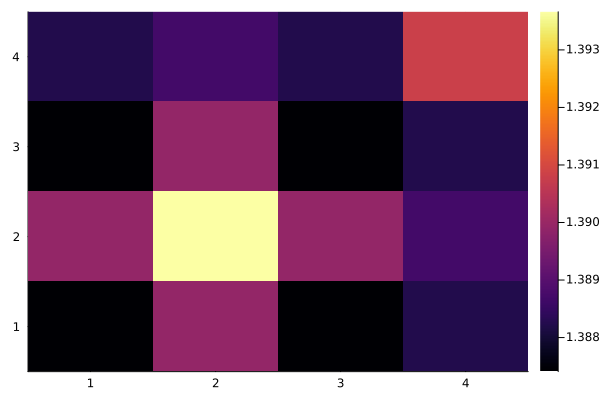

In [72]:
heatmap(LadderDGA.expandKArr(kG, real(F_d_test2[34,45,sub_i,51])))

In [73]:
LadderDGA.expandKArr(kG, real(F_d_test2[51,51,sub_i,51]))

4×4 Matrix{Float64}:
 12.0126  13.2432  12.0126  11.5212
 13.2432  15.9394  13.2432  11.7518
 12.0126  13.2432  12.0126  11.5212
 11.5212  11.7518  11.5212  11.4724

In [71]:
LadderDGA.expandKArr(h.kG, real(F_d_test2[51,51,:,51]))

8×8 Matrix{Float64}:
 11.4224  11.5662  11.8617  12.0378  11.8617  11.5662  11.4224  11.4469
 11.5662  12.0126  12.783   13.2432  12.783   12.0126  11.5662  11.5212
 11.8617  12.783   14.1331  14.9354  14.1331  12.783   11.8617  11.669
 12.0378  13.2432  14.9354  15.9394  14.9354  13.2432  12.0378  11.7518
 11.8617  12.783   14.1331  14.9354  14.1331  12.783   11.8617  11.669
 11.5662  12.0126  12.783   13.2432  12.783   12.0126  11.5662  11.5212
 11.4224  11.5662  11.8617  12.0378  11.8617  11.5662  11.4224  11.4469
 11.4469  11.5212  11.669   11.7518  11.669   11.5212  11.4469  11.4724

In [61]:
νlen = length(νnGrid)
klen = length(k_vecs)
F_d_ladder = F_d_test2[:,:,sub_i,:]
F_m_ladder = F_m_test2[:,:,sub_i,:]
ωn = 0; ωi = lDGAhelper.sP.n_iω+1



Γs_ladder1 = Array{ComplexF64, 2}(undef, length(k_vecs)*length(νnGrid), length(k_vecs)*length(νnGrid));
fill!(Γs_ladder1, NaN + 1im * NaN)
Γs_ladder2 = Array{ComplexF64, 2}(undef, length(k_vecs)*length(νnGrid), length(k_vecs)*length(νnGrid));
fill!(Γs_ladder2, NaN + 1im * NaN)
Γs_ladder1_G = Array{ComplexF64, 2}(undef, length(k_vecs)*length(νnGrid), length(k_vecs)*length(νnGrid));
fill!(Γs_ladder1_G, NaN + 1im * NaN)
Γs_ladder2_G = Array{ComplexF64, 2}(undef, length(k_vecs)*length(νnGrid), length(k_vecs)*length(νnGrid));
fill!(Γs_ladder2_G, NaN + 1im * NaN)

Fpp_test_1 = Array{ComplexF64, 4}(undef, length(k_vecs), length(νnGrid), length(k_vecs),length(νnGrid));
fill!(Fpp_test_1, NaN + 1im * NaN)
Fpp_test_2 = Array{ComplexF64, 4}(undef, length(k_vecs), length(νnGrid), length(k_vecs),length(νnGrid));
fill!(Fpp_test_2, NaN + 1im * NaN)
Fpp_test_1_G = Array{ComplexF64, 4}(undef, length(k_vecs), length(νnGrid), length(k_vecs),length(νnGrid));
fill!(Fpp_test_1_G, NaN + 1im * NaN)
Fpp_test_2_G = Array{ComplexF64, 4}(undef, length(k_vecs), length(νnGrid), length(k_vecs),length(νnGrid));
fill!(Fpp_test_2_G, NaN + 1im * NaN)

Fph_ladder_updo  = permutedims(0.5 .* F_d_ladder .- 1.5 .* F_m_ladder,[3,1,2,4]) .- reshape(0.5 .* F_d_loc .- 0.5 .* F_m_loc , 1, size(F_d_loc)...)
Fph_ladder_updo2 = permutedims(0.5 .* F_d_ladder .- 0.5 .* F_m_ladder,[3,1,2,4]) .- reshape(0.5 .* F_d_loc .- 0.5 .* F_m_loc , 1, size(F_d_loc)...)

for (νi,νn) in enumerate(νnGrid)
  for (νpi,νpn) in enumerate(νnGrid)      
    ν_minus_νp = trunc(Int, (2*νn+1 - (2*νpn+1))/2)            # νn - νpn
    νp_minus_ν = trunc(Int, (2*νpn+1 - (2*νn+1))/2)            # νpn - νn
    minus_ν_minus_νp = - νn - νpn - 1# trunc(Int, (-(2*νn+1) - (2*νpn+1))/2)   # - νn - νpn
    minus_ν       = trunc(Int, -(2*νn+1)/2 - 1*(νn >= 0))
    minus_νp      = trunc(Int, -(2*νpn+1)/2 - 1*(νpn >= 0))
    ν_plus_νp  = νn + νpn + 1
        
    ωi_ladder, νi_ladder, νpi_ladder  = Freq_to_OneToIndex(ν_minus_νp, νpn, minus_ν, lDGAhelper.sP.shift, lDGAhelper.sP.n_iω, lDGAhelper.sP.n_iν)
    ωi_ladder2,νi_ladder2,νpi_ladder2 = Freq_to_OneToIndex(minus_ν_minus_νp, νpn,  νn, lDGAhelper.sP.shift, lDGAhelper.sP.n_iω, lDGAhelper.sP.n_iν)
    νi_pp  = νn  + sP.n_iν+1; νpi_pp  = νpn + sP.n_iν+1; ωi_pp  = ωn  + sP.n_iω+1

    ωi_ladder_G,  νi_ladder_G,  νpi_ladder_G  = Freq_to_OneToIndex(minus_ν_minus_νp, νn,  νpn, lDGAhelper.sP.shift, lDGAhelper.sP.n_iω, lDGAhelper.sP.n_iν)
    ωi_ladder2_G, νi_ladder2_G, νpi_ladder2_G = Freq_to_OneToIndex(νp_minus_ν      , νn,  minus_νp, lDGAhelper.sP.shift, lDGAhelper.sP.n_iω, lDGAhelper.sP.n_iν)
    if freq_inbounds(ωi_ladder,νi_ladder,νpi_ladder,lDGAhelper.sP)
      for (ki,k_vec) in enumerate(k_vecs)
        for (kpi,kp_vec) in enumerate(k_vecs)
            G_mG = Gνk_Gmνmk[νpi, kpi];
            qi_k_minus_kp       = qi_access_k_minus_kp[ki,kpi];
            qi_kp_minus_k       = qi_access_kp_minus_k[ki,kpi];
            qi_minus_k_minus_kp = qi_access_minus_k_minus_kp[ki,kpi]
            Γs_ladder1[ki+length(k_vecs)*(νi-1),kpi+length(k_vecs)*(νpi-1)] =   -(   Fph_ladder_updo[qi_k_minus_kp, νi_ladder,νpi_ladder,ωi_ladder]  
                                                                                  .- ϕ_pp_ud2[νi_pp,νpi_pp,ωi_pp]
                                                                                 ) * G_mG  / (2 * kG.Nk * lDGAhelper.mP.β)
            #Fpp_test_1[ki,νi,kpi,νpi] = 
            Γs_ladder2[ki+length(k_vecs)*(νi-1),kpi+length(k_vecs)*(νpi-1)] =   -(   Fph_ladder_updo2[qi_k_minus_kp,νi_ladder,νpi_ladder,ωi_ladder]                  
                                                                                  .- F_m_ladder[νi_ladder2,νpi_ladder2,qi_kp_minus_k,ωi_ladder2] 
                                                                                  .- ϕ_pp_ud2[νi_pp,νpi_pp,ωi_pp]
                                                                                 ) * G_mG  / (2 * kG.Nk * lDGAhelper.mP.β)  
            #Fpp_test_2[ki,νi,kpi,νpi] = 
            Γs_ladder1_G[ki+length(k_vecs)*(νi-1),kpi+length(k_vecs)*(νpi-1)] = -(   Fph_ladder_updo[qi_minus_k_minus_kp,νi_ladder_G,νpi_ladder_G,ωi_ladder_G]
                                                                                  .- ϕ_pp_ud2[νi_pp,νpi_pp,ωi_pp]) * G_mG  / (2 * kG.Nk * lDGAhelper.mP.β)
            #Fpp_test_1_G[ki,νi,kpi,νpi] = 
            Γs_ladder2_G[ki+length(k_vecs)*(νi-1),kpi+length(k_vecs)*(νpi-1)] = -(   Fph_ladder_updo2[qi_minus_k_minus_kp,νi_ladder2_G,νpi_ladder2_G,ωi_ladder2_G] 
                                                                                  .- F_m_ladder[νi_ladder2_G,νpi_ladder2_G,qi_kp_minus_k,ωi_ladder2_G] 
                                                                                  .- ϕ_pp_ud2[νi_pp,νpi_pp,ωi_pp]) * G_mG  / (2 * kG.Nk * lDGAhelper.mP.β)
            #Fpp_test_2_G[ki,νi,kpi,νpi] = 
        end
      end
        else
      println("$νn / $νpn out of bounds")
    end 
  end
end

LoadError: BoundsError: attempt to access 6×100×100×101 Array{ComplexF64, 4} at index [9, 41, 41, 70]

In [ ]:
p1 = heatmap(real(Γs_ladder1), title="Re Zusammen (J)")
p2 = heatmap(imag(Γs_ladder1), title="Im Zusammen (J)", clims=(-0.001,0.001))
p3 = heatmap(real(Γs_ladder1_G), title="Re Zusammen (G)")
p4 = heatmap(imag(Γs_ladder1_G), title="Im Zusammen (G)", clims=(-0.001,0.001))

plot(p1, p2, p3, p4, size=(800,500))

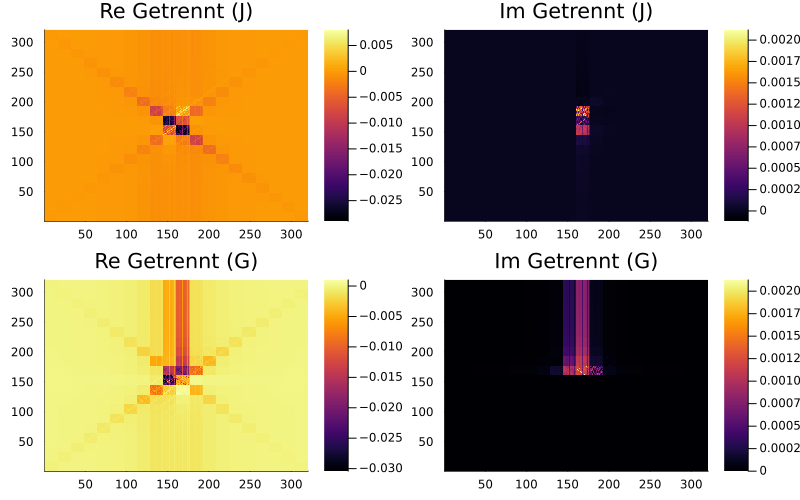

In [102]:
p1 = heatmap(real(Γs_ladder2), title="Re Getrennt (J)")
p2 = heatmap(imag(Γs_ladder2), title="Im Getrennt (J)")
p3 = heatmap(real(Γs_ladder2_G), title="Re Getrennt (G)")
p4 = heatmap(imag(Γs_ladder2_G), title="Im Getrennt (G)")

plot(p1, p2, p3, p4, size=(800,500))

In [103]:
using LinearAlgebra
@time ev1,vv1 = eigen(Γs_ladder1, sortby=x->real(x))#Γs_ladder3)
@time ev2,vv2 = eigen(Γs_ladder2, sortby=x->real(x));#Γs_ladder4)
#@time ev4_2,vv4_2 = eigen(real.(Γs_ladder4)); #Γs_ladder4));

  1.328626 seconds (1.84 M allocations: 117.851 MiB, 90.11% compilation time)
  0.397315 seconds (435.48 k allocations: 32.274 MiB, 80.91% compilation time)


In [104]:
@time ev1_G,vv1_G = eigen(Γs_ladder1_G, sortby=x->real(x))#Γs_ladder3)
@time ev2_G,vv2_G = eigen(Γs_ladder2_G, sortby=x->real(x));

  0.412471 seconds (435.49 k allocations: 32.278 MiB, 79.81% compilation time)
  0.402685 seconds (435.48 k allocations: 32.259 MiB, 78.30% compilation time)


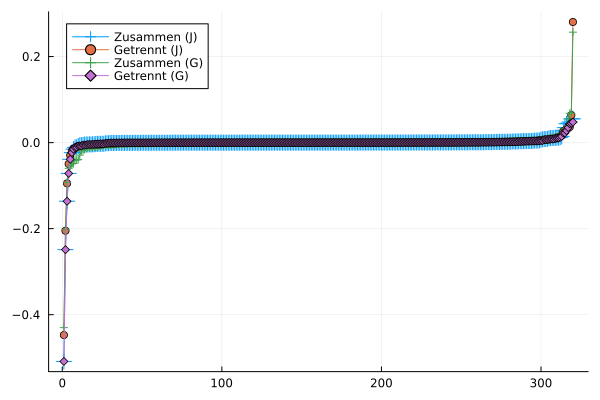

In [105]:
plot(sort(real(ev1)), markershape=:auto, label="Zusammen (J)", markersize=8)
plot!(sort(real(ev2)), markershape=:auto, label="Getrennt (J)")
plot!(sort(real(ev1_G)), markershape=:auto, label="Zusammen (G)")
plot!(sort(real(ev2_G)), markershape=:auto, label="Getrennt (G)")

  0.357936 seconds (342.61 k allocations: 26.229 MiB, 76.46% compilation time)
  0.316570 seconds (342.10 k allocations: 26.209 MiB, 74.66% compilation time)
  0.352529 seconds (342.10 k allocations: 26.196 MiB, 77.78% compilation time)
  0.375981 seconds (342.11 k allocations: 26.213 MiB, 71.61% compilation time)


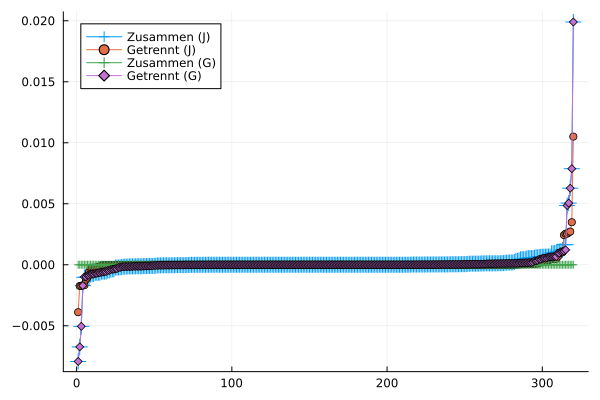

In [106]:
@time ev1,vv1 = eigen(Γs_ladder1, sortby=x->imag(x))#Γs_ladder3)
@time ev2,vv2 = eigen(Γs_ladder2, sortby=x->imag(x));
@time ev1_G,vv1_G = eigen(Γs_ladder1_G, sortby=x->imag(x))#Γs_ladder3)
@time ev2_G,vv2_G = eigen(Γs_ladder2_G, sortby=x->imag(x));
p1 = plot(imag(ev1), markershape=:auto, label="Zusammen (J)", markersize=8)
plot!(imag(ev2), markershape=:auto, label="Getrennt (J)")
plot!(imag(ev1_G), markershape=:auto, label="Zusammen (G)")
plot!(imag(ev2_G), markershape=:auto, label="Getrennt (G)")

### Internal Test

In [38]:
λ_max,λ_min = calc_λmax_linEliashberg(bubble, χm, χd, γm, γd, lDGAhelper, env; GF=lDGAhelper.gLoc, max_Nk=4)

Brute force checking for possible sub-samples. This needs to be rewritten
┌ Warning: TODO: currently calculating two versions of Γ_pp, until Fm_{k'-k} question is resolved
└ @ LadderDGA ~/Codes/LadderDGA.jl/src/LinearizedEliashberg.jl:111


(ComplexF64[0.17861302743458748 - 5.481642894839955e-8im], ComplexF64[-0.4583784931575655 - 2.0140210535970033e-7im])

In [39]:
λ₀ = calc_λ0(bubble, lDGAhelper)
res_dm = λdm_correction(χm, γm, χd, γd, λ₀, lDGAhelper; fit_μ=true)

DBG: NOT using diagonal terms in λ₀


λ-correction (type: dm), converged
λm = 0.007291685213018235, λd = 0.1007477550264544
trace: 
DataFrames.DataFrame[]


## Matrix Free Tests

In [ ]:
    minus_ν_minus_νp = trunc(Int, (-(2*νn+1) - (2*νpn+1))/2)   # - νn - νpn     
    νi_pp  = νn  + sP.n_iν+1; νpi_pp  = νpn + sP.n_iν+1; ωi_pp  = ωn  + sP.n_iω+1

    ωi_ladder_G,  νi_ladder_G,  νpi_ladder_G  = Freq_to_OneToIndex(minus_ν_minus_νp, νn,  νpn, lDGAhelper.sP.shift, lDGAhelper.sP.n_iω, lDGAhelper.sP.n_iν)
        
    if freq_inbounds(ωi_ladder,νi_ladder,νpi_ladder,lDGAhelper.sP)

      for (ki,k_vec) in enumerate(k_vecs)
        for (kpi,kp_vec) in enumerate(k_vecs)
            G_mG = Gνk_Gmνmk[νpi, kpi];
            qi_k_minus_kp       = qi_access_k_minus_kp[ki,kpi];
            qi_kp_minus_k       = qi_access_kp_minus_k[ki,kpi];
            qi_minus_k_minus_kp = qi_access_minus_k_minus_kp[ki,kpi]

            Γs_ladder1_G[ki+length(k_vecs)*(νi-1),kpi+length(k_vecs)*(νpi-1)] = -(   Fph_ladder_updo[qi_minus_k_minus_kp,νi_ladder_G,νpi_ladder_G,ωi_ladder_G]
                                                                                  .- ϕ_pp_ud2[νi_pp,νpi_pp,ωi_pp]) * G_mG  / (2 * kG.Nk * lDGAhelper.mP.β)

In [ ]:
using LinearAlgebra, Arpack, LinearMaps
using BenchmarkTools

N = 30
A = convert.(Float64, reshape(1:(N*N),N,N))
f(i,j) = 1.0*j .+ (N-1) .* (j .- 1) .+ (i .- 1)
f2(v) = map(i -> sum(v .* f(i,1:N)), 1:N)

A_mf = LinearMap{Float64}(f2,N)
vals1,vecs1 = eigs(A, which=:LM, nev=2, tol=1e-12, maxiter=500)
vals2,vecs2 = eigs(A_mf, which=:LM, nev=2, tol=1e-12, maxiter=500)
println("CHECK: ", all(isapprox.(vals1,vals2))))
# execute once for precompilation
@benchmark vals1,vecs1 = eigs($A, which=:LM, nev=2, tol=1e-12, maxiter=500)
@benchmark vals2,vecs2 = eigs($A_mf, which=:LM, nev=2, tol=1e-12, maxiter=500)

In [257]:
#Γs_ladder1 = Array{ComplexF64, 2}(undef, length(k_vecs)*length(νnGrid), length(k_vecs)*length(νnGrid));
#fill!(Γs_ladder1, NaN + 1im * NaN)
function Γs_op(vec)
    ωi_pp  = sP.n_iω+1
    res = zeros(ComplexF64, length(vec))
    for (νi,νn) in enumerate(νnGrid)
      νi_pp  = νn + sP.n_iν+1;
      for (νpi,νpn) in enumerate(νnGrid)      
        minus_ν_minus_νp = -νn - νpn - 1     # - νn - νpn
        νpi_pp  = νpn + sP.n_iν+1;
    
        ωi_ladder_G,  νi_ladder_G,  νpi_ladder_G  = Freq_to_OneToIndex(minus_ν_minus_νp, νn,  νpn, lDGAhelper.sP.shift, lDGAhelper.sP.n_iω, lDGAhelper.sP.n_iν)
        if freq_inbounds( ωi_ladder_G,  νi_ladder_G,  νpi_ladder_G,lDGAhelper.sP)
          for (ki,k_vec) in enumerate(k_vecs)
            for (kpi,kp_vec) in enumerate(k_vecs)
                G_mG = Gνk_Gmνmk[νpi, kpi];
                qi_minus_k_minus_kp = qi_access_minus_k_minus_kp[ki,kpi]
                res[ki+length(k_vecs)*(νi-1)] += -vec[kpi+length(k_vecs)*(νpi-1)] * (   Fph_ladder_updo[qi_minus_k_minus_kp,νi_ladder_G,νpi_ladder_G,ωi_ladder_G]
                                                                     .- ϕ_pp_ud2[νi_pp,νpi_pp,ωi_pp]) * G_mG  / (2 * kG.Nk * lDGAhelper.mP.β)
            end
          end
        else
          println("$νn / $νpn out of bounds")
        end 
      end
    end
    return real(res)
end

Γs_op (generic function with 1 method)

In [281]:
using LinearAlgebra, Arpack, LinearMaps
N_LM = νlen*klen

ev1_check, vv1_check = eigen(real(Γs_ladder1_G))

Γs_LM = LinearMap{Float64}(Γs_op, N_LM, issymmetric = false)
vals1,vecs1 = eigs(Γs_LM, which=:LR, nev=2, tol=0, maxiter=500)
vals2,vecs2 = eigs(Γs_ladder1_G, which=:LR, nev=2,tol=0, maxiter=500)

(ComplexF64[0.17558134347017051 - 5.425860521452204e-8im, 0.06044909922566642 - 8.34477484071678e-9im], ComplexF64[-0.04180619260905355 + 0.035364695874544945im 0.1690872404340022 + 0.2960501612870908im; -0.04526136099831723 + 0.038287483454053195im 0.1758908729127382 + 0.30796245820723983im; … ; 0.04526135711749214 - 0.03828748804905187im -0.1758908473175771 - 0.3079624728249977im; 0.04727483941900576 - 0.0399907282732912im -0.17877556775450515 - 0.3130132507352758im], 2, 1, 16, ComplexF64[0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im])

In [1]:
sort(real(ev1_check))

LoadError: UndefVarError: `ev1_check` not defined

In [2]:
sort(real(vals1))

LoadError: UndefVarError: `vals1` not defined

In [3]:
sort(real(vals2))

LoadError: UndefVarError: `vals2` not defined